In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("test.csv")

In [3]:
df.head()

,age,sex,serum,fatigue,muscle_bone_pain,deprerssion,breathing,pale_skin,hair_loss,diagnosis
0,75,0,11,1,1,1,0,0,1,2
1,56,1,309,0,0,0,0,0,0,3
2,54,0,13,1,1,1,0,0,1,2
3,55,0,28,1,0,1,1,1,0,1
4,75,0,6,1,1,1,0,0,1,2


In [4]:
df.tail()

,age,sex,serum,fatigue,muscle_bone_pain,deprerssion,breathing,pale_skin,hair_loss,diagnosis
1351,53,1,39,1,0,1,1,1,0,1
1352,37,0,7,1,1,1,0,0,1,2
1353,36,0,15,1,1,1,0,0,1,2
1354,32,1,82,1,0,1,1,1,0,1
1355,78,1,184,1,0,1,1,1,1,1


In [5]:
df.size

13560

In [6]:
df.shape

(1356, 10)

In [7]:
df.columns

Index(['age', 'sex', 'serum', 'fatigue', 'muscle_bone_pain', 'deprerssion',
       'breathing', 'pale_skin', 'hair_loss', 'diagnosis'],
      dtype='object')

In [8]:
df['diagnosis'].unique()

array([2, 3, 1], dtype=int64)

In [9]:
df.dtypes

age                 int64
sex                 int64
serum               int64
fatigue             int64
muscle_bone_pain    int64
deprerssion         int64
breathing           int64
pale_skin           int64
hair_loss           int64
diagnosis           int64
dtype: object

In [10]:
df['diagnosis'].value_counts()

1    735
2    417
3    204
Name: diagnosis, dtype: int64

<AxesSubplot:>

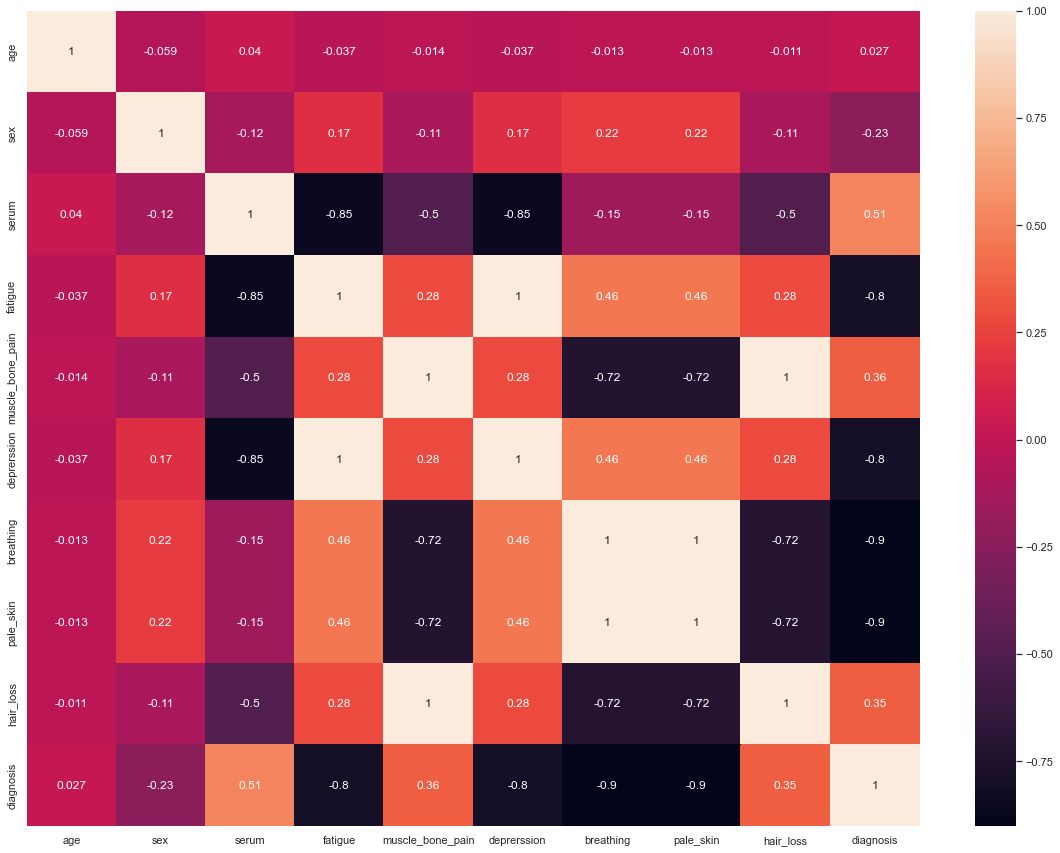

In [11]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [12]:
features = df[['age', 'sex', 'serum', 'fatigue', 'muscle_bone_pain', 'deprerssion',
       'breathing', 'pale_skin', 'hair_loss']]
target = df['diagnosis']


In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        50

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([1., 1., 1., 1., 1.])

### Saving trained Decision Tree model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        50

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Guassian Naive Bayes model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        50

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.84558824, 0.81180812, 0.81180812, 0.83763838, 0.85239852])

In [25]:
#Saving trained SVM model

In [26]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        50

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



In [28]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Random Forest model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

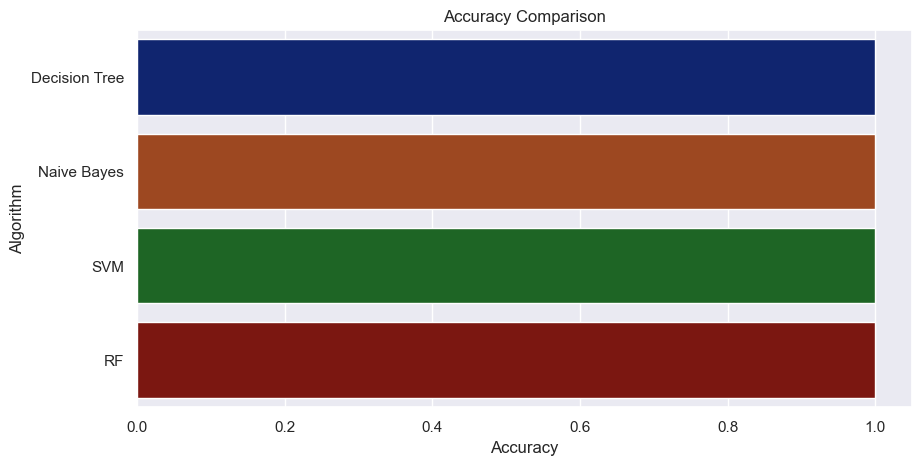

In [30]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [31]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 1.0
RF --> 1.0


## Making a prediction

In [32]:
data = np.array([[75,0,11,1,1,1,0,0,1]])
prediction = RF.predict(data)[0]
print(prediction)
if prediction==1:
    print("B_12 Deficeincy")
elif prediction==2:
    print("D Deficiency")
elif prediction==3:
    print("Normal")

2
D Deficiency


In [33]:
data = np.array([[56,1,309,0,0,0,0,0,0]])
prediction = RF.predict(data)[0]
print(prediction)
if prediction==1:
    print("B_12 Deficeincy")
elif prediction==2:
    print("D Deficiency")
elif prediction==3:
    print("Normal")

3
Normal


In [34]:
data = np.array([[55,0,28,1,0,1,1,1,0]])
prediction = RF.predict(data)[0]
print(prediction)

1


In [37]:
import pickle 
pickle.dump(RF,open("rf.pkl","wb"))